# Blind/referenceless image spatial quality evaluator (BRISQUE)

**BRISQUE (Blind/Referenceless Image Spatial Quality Evaluator)** is a state-of-the-art method for evaluating the quality of an image without the need for a reference image. Unlike traditional methods that rely on comparing the test image with a perfect or original image, BRISQUE assesses quality based on the natural scene statistics of the image itself. 

Compare to PSNR and SSIM, often criticized for not aligning well with human perception and require reference image. BRISQUE provides a more flexible and human-centric approach to image quality since its independence from reference images makes it particularly useful in scenarios where such references are not available or practical. However, the specific choice between BRISQUE, PSNR, and SSIM should be guided by the particular requirements and constraints of the application at hand.

[more detail](https://learnopencv.com/image-quality-assessment-brisque/)

reference: https://archive.is/20201213161243/https://towardsdatascience.com/automatic-image-quality-assessment-in-python-391a6be52c11

In [2]:
import os 

import numpy as np
import matplotlib.pyplot as plt

import h5py


import sys
sys.path.append('../')

from module.datasets import load_4d_dicom
from module.utils import display_image_in_detail, calculate_metrics
from brisque import BRISQUE

## 1. Load evaluate data

In [3]:
# with h5py.File('../dataset/preprocessed/PT_20p 150_120 OSEM_gauss_0.009.h5', 'r') as f:
#     evl_data = f['dataset'][...]
#     restore_info = f['restore_info'][...]

# # denormalized 
# print(restore_info)

# mean_val = 201.12048776036573
# std_val = 1412.4139804758772
# max_val = 23.05689405684542
# min_val = -23.34168377224119


# evl_data = evl_data * (max_val - min_val) + min_val
# evl_data = evl_data * std_val + mean_val

# evl_data = np.clip(evl_data, np.iinfo(np.int16).min, np.iinfo(np.int16).max).astype(np.int16)


evl_data_folder = "../dataset/denoised/BM4D/PT_20p 150_120 OSEM_gauss_0.009/"
evl_data = load_4d_dicom(evl_data_folder)


print(f"evl_data: {evl_data.dtype} shape:{evl_data.shape}; range:({np.min(evl_data)},{np.max(evl_data)}); mean:{np.mean(evl_data)}; std:{np.std(evl_data)}")

evl_data: int16 shape:(24, 71, 192, 192); range:(-32768,32767); mean:200.72938793104765; std:1406.5552662283746


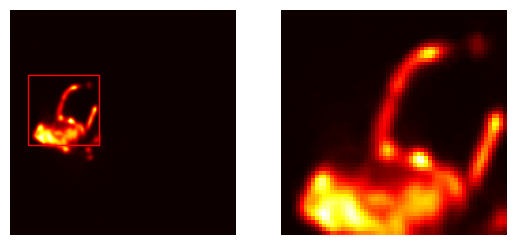

In [27]:
time_idx = 11
frame_idx = 38

gray_image = evl_data[time_idx, frame_idx]

display_image_in_detail(gray_image)

## 2. Calculate BRISQUE

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 191.5, 191.5, -0.5)

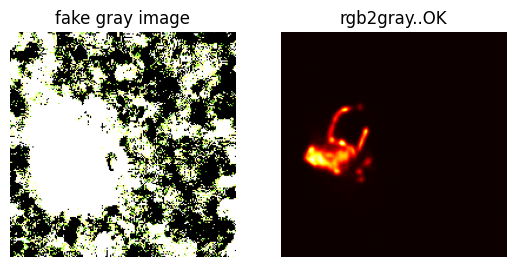

In [28]:
# convet grayscale into fake rgb image since BRISQUE package always assumpe the input is gray, gay!!!
from skimage.color import rgb2gray


rgb_image = np.stack([0.2125 * gray_image, 0.7154 * gray_image, 0.0721 * gray_image], axis=2)


plt.figure()

plt.subplot(1, 2, 1)
plt.imshow(rgb_image)
plt.title('fake gray image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(rgb2gray(rgb_image), cmap='hot')
plt.title('rgb2gray..OK')
plt.axis('off')

In [29]:
brisque = BRISQUE(url=False)
quality_score = brisque.score(rgb_image)

print(quality_score)

54.103629194955914
